### Top Ramen Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [2]:
df=pd.read_csv('../data/Top_Ramen_Ratings.csv')

In [3]:
df.head()

,Review #,Brand,Variety,Style,Country,Stars,T
0,4120,MIT,Shallot Sauce Dry Noodle,Pack,Taiwan,3,NaN
1,4119,Sapporo Ichiban,Tonkotsu Ramen Japanese Style Noodles,Bowl,United States,4.5,NaN
2,4118,Binh Tay,Mi Kiwi,Bowl,Vietnam,3,NaN
3,4117,Charming Couple,Biang Biang Scallion Chicken Sauce,Pack,Taiwan,4.5,NaN
4,4116,immi,Tom Yum Shrimp Flavor Ramen Soup,Pack,United States,2.75,NaN


In [4]:
df.shape

(4120, 7)

In [5]:
df.isnull().sum()

Review #       0
Brand          0
Variety        0
Style          0
Country        0
Stars          0
T           4120
dtype: int64

In [6]:
df.drop('T', axis='columns', inplace=True)
df.head()

,Review #,Brand,Variety,Style,Country,Stars
0,4120,MIT,Shallot Sauce Dry Noodle,Pack,Taiwan,3
1,4119,Sapporo Ichiban,Tonkotsu Ramen Japanese Style Noodles,Bowl,United States,4.5
2,4118,Binh Tay,Mi Kiwi,Bowl,Vietnam,3
3,4117,Charming Couple,Biang Biang Scallion Chicken Sauce,Pack,Taiwan,4.5
4,4116,immi,Tom Yum Shrimp Flavor Ramen Soup,Pack,United States,2.75


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4120 entries, 0 to 4119
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  4120 non-null   int64 
 1   Brand     4120 non-null   object
 2   Variety   4120 non-null   object
 3   Style     4120 non-null   object
 4   Country   4120 non-null   object
 5   Stars     4120 non-null   object
dtypes: int64(1), object(5)
memory usage: 193.3+ KB


In [8]:
# to summarise stars, count values in that column
df['Stars'].value_counts()

Stars
5          775
3.5        607
3.75       581
4          489
4.5        282
3.25       236
4.25       223
3          191
2.75       118
2          104
4.75       103
2.5        102
1.5         54
0           44
1           44
1.75        33
2.25        32
0.5         24
0.25        21
1.25        16
NR           3
Unrated      3
4.25/5       2
1.1          2
0.75         2
3.1          2
2.9          2
2.8          2
4.125        2
4.5/5        1
5/5          1
4/4          1
3.5/2.5      1
NS           1
2.1          1
3.50         1
5/2.5        1
5/4          1
3.125        1
0.9          1
2.125        1
0.1          1
3.7          1
3.4          1
3.6          1
2.85         1
2.3          1
3.2          1
3.65         1
1.8          1
Name: count, dtype: int64

In [11]:
# filter and create a mask
no_stars_msk = (df['Stars'] == 'NR') | (df['Stars'] == 'Unrated') | (df['Stars'] == 'NS')
df_no_rating_rows = df[no_stars_msk]
df_no_rating_rows

,Review #,Brand,Variety,Style,Country,Stars
687,3433,Base Foods,Base Noodles,Pack,United States,NS
970,3150,Hakubaku,Baby Somen,Pack,Japan,NR
971,3149,Hakubaku,Baby Udon,Pack,Japan,NR
1479,2641,Nanoblock,Ramen Bokki,Pack,Japan,NR
1572,2548,Ottogi,Plain Instant Noodle No Soup Included,Pack,South Korea,Unrated
1662,2458,Samyang Foods,Sari Ramen,Pack,South Korea,Unrated
2533,1587,Mi E-Zee,Plain Noodles,Pack,Malaysia,Unrated


In [12]:
df.shape

(4120, 6)

In [ ]:
df = df[~no_stars_msk] # ~ removes all values which are true for that mask
df.shape

(4113, 6)

In [ ]:
# this regex looks for '/' and anything that follows after that and replaces with '' empty value
df['Stars'] = df['Stars'].str.replace(r'/.*', '', regex=True)

In [15]:
df['Stars'].value_counts()

Stars
5        778
3.5      608
3.75     581
4        490
4.5      283
3.25     236
4.25     225
3        191
2.75     118
2        104
4.75     103
2.5      102
1.5       54
0         44
1         44
1.75      33
2.25      32
0.5       24
0.25      21
1.25      16
0.75       2
1.1        2
4.125      2
3.1        2
2.8        2
2.9        2
2.1        1
3.50       1
3.125      1
0.9        1
2.125      1
0.1        1
3.7        1
3.4        1
3.6        1
2.85       1
2.3        1
3.2        1
3.65       1
1.8        1
Name: count, dtype: int64

In [16]:
df['Stars'] = pd.to_numeric(df['Stars'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4113 entries, 0 to 4119
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Review #  4113 non-null   int64  
 1   Brand     4113 non-null   object 
 2   Variety   4113 non-null   object 
 3   Style     4113 non-null   object 
 4   Country   4113 non-null   object 
 5   Stars     4113 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 224.9+ KB


In [17]:
df = df[(df['Stars'] >= 0) & (df['Stars'] <= 5)]
df.shape

(4113, 6)

### data transformations 

In [ ]:
unique_countries_sorted = sorted(df['Country'].unique())
unique_countries_sorted

['Australia',
 'Bangladesh',
 'Brazil',
 'Cambodia',
 'Canada',
 'China',
 'Colombia',
 'Dubai',
 'Estonia',
 'Fiji',
 'Finland',
 'France',
 'Germany',
 'Ghana',
 'Holland',
 'Hong Kong',
 'Hungary',
 'India',
 'Indonesia',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Malaysia',
 'Mexico',
 'Myanmar',
 'Nepal',
 'Netherlands',
 'New Zealand',
 'Nigeria',
 'Pakistan',
 'Peru',
 'Philippines',
 'Phlippines',
 'Poland',
 'Portugal',
 'Russia',
 'Russian Federation',
 'Sarawak',
 'Serbia',
 'Singapore',
 'Souh Korea',
 'South Korea',
 'Spain',
 'Sweden',
 'Taiwan',
 'Thailand',
 'UK',
 'USA',
 'Ukraine',
 'United Kingdom',
 'United States',
 'Vietnam']

In [19]:
countries = {
    'Holland': 'Netherlands',
    'Phlippines': 'Philippines',
    'Russian Federation': 'Russia',
    'Souh Korea': 'South Korea',
    'Sarawak': 'Malaysia',
    'UK': 'United Kingdom',
    'USA': 'United States'
}

df['Country'] = df['Country'].replace(countries)
df['Country'].value_counts()

Country
Japan             797
United States     570
South Korea       428
Taiwan            405
China             286
Thailand          233
Malaysia          230
Hong Kong         205
Indonesia         175
Singapore         144
Vietnam           129
United Kingdom     77
Canada             56
Philippines        54
India              46
Germany            38
Mexico             32
Australia          25
Brazil             24
Netherlands        20
Nepal              14
Myanmar            14
Pakistan           13
Bangladesh         12
Hungary             9
Russia              7
France              6
Poland              6
Colombia            6
Serbia              5
Cambodia            5
Ireland             4
Peru                4
Italy               4
Fiji                4
Finland             3
Spain               3
Israel              3
Dubai               3
Sweden              3
Ukraine             3
Ghana               2
Estonia             2
Nigeria             2
Portugal            1
Ne

In [22]:
unique_brands_sorted = sorted(df['Brand'].unique())
unique_brands_sorted

['1 To 3 Noodles',
 '7 Select',
 '7 Select/Nissin',
 '7-Eleven / Nissin',
 'A-One',
 'A-Sha',
 'A-Sha Dry Noodle',
 'A1',
 'ABC',
 'ABC President',
 'Acecook',
 'Aces',
 'Adabi',
 'Ah Lai',
 'Aji-no-men',
 'Ajinatori',
 'Ajinomoto',
 'Alhami',
 'Amianda',
 'Amino',
 "Annie Chun's",
 'Ao Ba Ba',
 'Aroi',
 'Artisan',
 'Asia Gold',
 'Asian Thai Foods',
 'Assi',
 'Atomy',
 'Authentically Asian',
 'Azami',
 'Baijia',
 'Baixiang',
 'Baixiang Noodles',
 'Baltix',
 'Baman',
 'Bamee',
 'Banzai',
 'Batchelors',
 'Being Blue',
 'Best Wok',
 'Big Bon',
 'Binh Tay',
 'Blount',
 'Bon Go Jang',
 'Bonasia',
 'Boss',
 'Bowlfull',
 'Boys & Girls',
 'Buitoni',
 'Burung Layang Terbang',
 'CJ CheilJedang',
 'COCO 2.0',
 "Campbell's",
 'Canton',
 'Cao Is Starving',
 'Cap Atoom Bulan',
 'CarJEN',
 'Charming Couple',
 "Chaudhary's Wai Wai",
 'Cheetos',
 "Chef Nic's Noodles",
 'Chef Woo',
 'Chencun',
 'Chering Chang',
 'Chewy',
 'Chikara',
 'Chil Kab Farm Products',
 'Chillies Brand',
 'China Best',
 "Ching's 

In [23]:
brand_names_map = {
    'A-Sha Dry Noodle':'A-Sha',
    'ABC President':'ABC',
    'Baixiang Noodles':'Baixiang',
    'ChoripDong':'Chorip Dong',
    'Fantastic Noodles':'Fantastic',
    'Fashion Foods':'Fashion Food',
    'Hua Feng Noodle Expert':'Hua Feng',
    'Ichiran Ramen':'Ichiran',
    'Lau Liu tou':'Lau Liu Tou',
    'Lishan Food Manufacturing':'Lishan',
    'Mr. Lee\'s Noodles':'Mr. Lee\'s',
    'Mr. Noodle':'Mr. Noodles',
    'Nakaki Foods':'Nakaki Food',
    'Nakaki':'Nakaki Food',
    'Nissin ':'Nissin',
    'Nissin Miojo':'Nissin',
    'Nissin-Miojo':'Nissin',
    "O'taste":'O\'Taste',
    "O\'Taste":'O\'Taste',
    'Sakurai Foods':'Sakurai',
    'Samurai Ramen':'Samurai',
    'Seven&I':'Seven & I',
    'Seven & i':'Seven & I',
    'Sugakiya Foods':'Sugakiya',
    'Tablemark':'TableMark',
    'Tasty ly':'Tasty.ly',
    'Thien Houng Foods':'Thien Houng Food',
    'Three Meters Noodles':'Three Meters',
    'Tseng Noodle':'Tseng Noodles',
    'Unif / Tung-I':'Unif',
    'Unif Tung-I':'Unif',
    'Unif-100':'Unif',
    'Yamamoto Seifun':'Yamamoto',
    'Weh Lih':'Wei Lih',
    'Wu Mu':'Wu-Mu',
    'World O Noodle':'World O\' Noodle'
}

df['Brand'] = df['Brand'].replace(brand_names_map)
unique_brands_sorted_renamed = sorted(df['Brand'].unique())
unique_brands_sorted_renamed

['1 To 3 Noodles',
 '7 Select',
 '7 Select/Nissin',
 '7-Eleven / Nissin',
 'A-One',
 'A-Sha',
 'A1',
 'ABC',
 'Acecook',
 'Aces',
 'Adabi',
 'Ah Lai',
 'Aji-no-men',
 'Ajinatori',
 'Ajinomoto',
 'Alhami',
 'Amianda',
 'Amino',
 "Annie Chun's",
 'Ao Ba Ba',
 'Aroi',
 'Artisan',
 'Asia Gold',
 'Asian Thai Foods',
 'Assi',
 'Atomy',
 'Authentically Asian',
 'Azami',
 'Baijia',
 'Baixiang',
 'Baltix',
 'Baman',
 'Bamee',
 'Banzai',
 'Batchelors',
 'Being Blue',
 'Best Wok',
 'Big Bon',
 'Binh Tay',
 'Blount',
 'Bon Go Jang',
 'Bonasia',
 'Boss',
 'Bowlfull',
 'Boys & Girls',
 'Buitoni',
 'Burung Layang Terbang',
 'CJ CheilJedang',
 'COCO 2.0',
 "Campbell's",
 'Canton',
 'Cao Is Starving',
 'Cap Atoom Bulan',
 'CarJEN',
 'Charming Couple',
 "Chaudhary's Wai Wai",
 'Cheetos',
 "Chef Nic's Noodles",
 'Chef Woo',
 'Chencun',
 'Chering Chang',
 'Chewy',
 'Chikara',
 'Chil Kab Farm Products',
 'Chillies Brand',
 'China Best',
 "Ching's Secret",
 'Chitato',
 'Chongqing Suanlabao Food Co., Ltd.',


### grouping and aggregation

In [24]:
country_avg = df.groupby('Country')['Stars'].mean().sort_values(ascending=False)
style_avg = df.groupby('Style')['Stars'].mean().sort_values(ascending=False)
brand_avg = df.groupby('Brand')['Stars'].mean().sort_values(ascending=False)

### bar chart with avg group by country

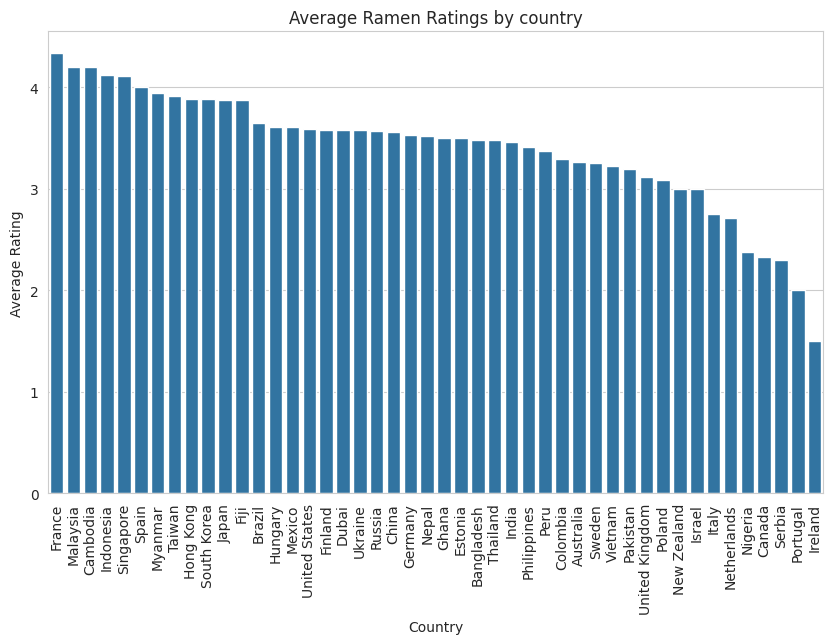

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(x=country_avg.index, y=country_avg.values)
plt.xticks(rotation=90)
plt.title('Average Ramen Ratings by country')
plt.xlabel('Country')
plt.ylabel('Average Rating')
plt.show()

In [27]:
country_review_counts = df['Country'].value_counts()

print('Number of reviews from France: ', country_review_counts.get('France',0))

Number of reviews from France:  6


In [33]:
france_reviews = df[df['Country'] == 'France']
# france_reviews.head()

print(france_reviews[['Brand', 'Variety', 'Stars']])

               Brand                                Variety  Stars
637          Mr. Min      Original Korean Ramen Beef Flavor   4.25
659          Mr. Min  Original Korean Ramen Instant Noodles   5.00
943  Maison de Coree                 Ramen Gout Coco Poulet   3.75
950  Maison de Coree                   Ramen Gout Carbonara   4.00
967  Maison de Coree                   Ramen Gout BBQ Coree   5.00
975  Maison de Coree                  Ramen Gout Poulet Feu   4.00


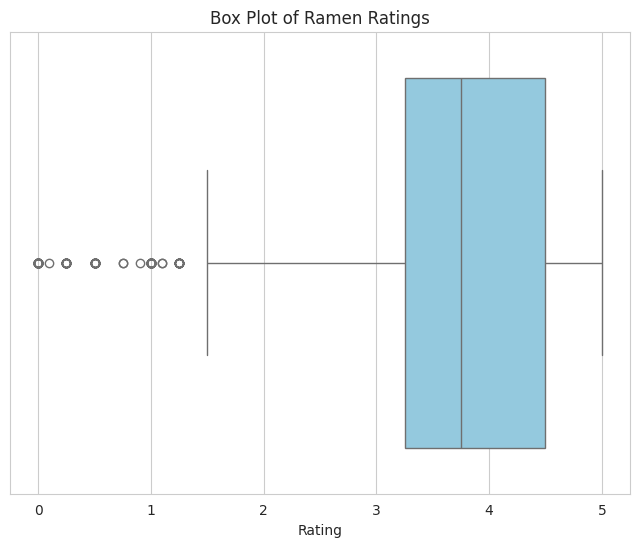

In [34]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Stars'], color='skyblue')
plt.title('Box Plot of Ramen Ratings')
plt.xlabel('Rating')
plt.show()

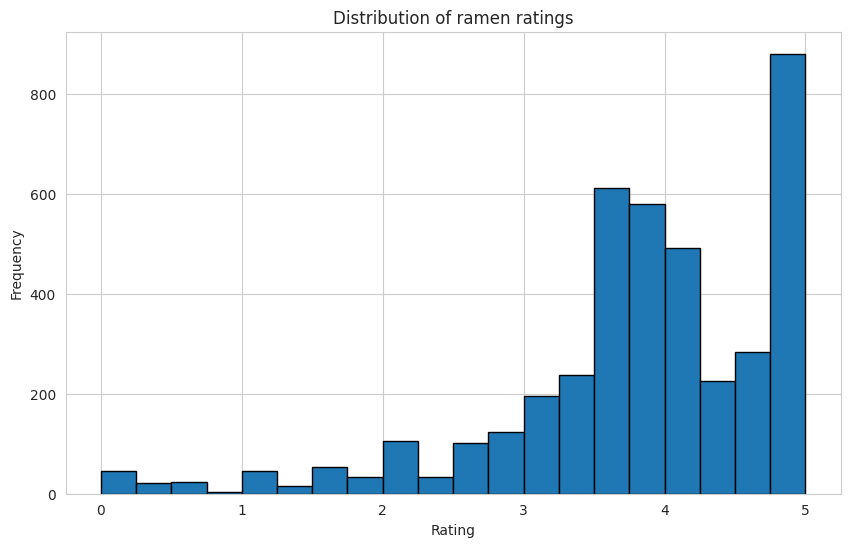

In [35]:
plt.figure(figsize=(10,6))
plt.hist(df['Stars'], bins=20, edgecolor='black')
plt.title('Distribution of ramen ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

/tmp/ipykernel_5997/4174154117.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_review_counts.head(20).values, y=brand_review_counts.head(20).index, palette='viridis', legend=False)


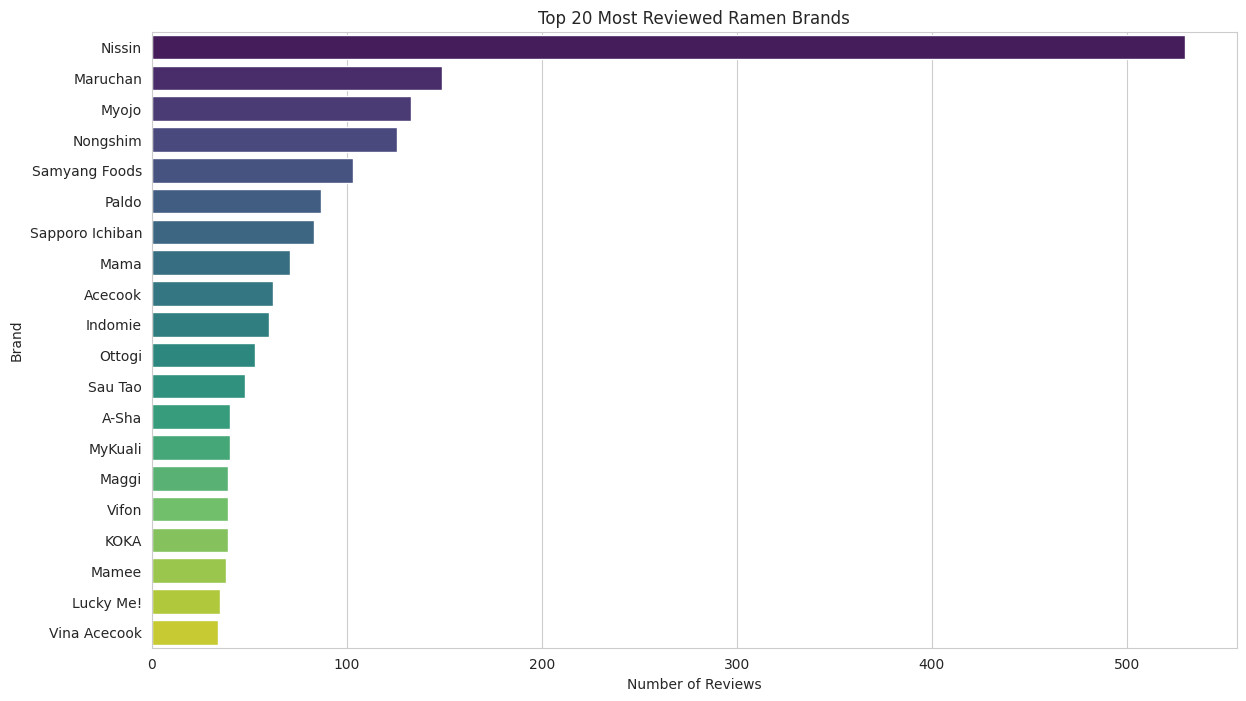

In [37]:
brand_review_counts = df['Brand'].value_counts()

plt.figure(figsize=(14, 8))
sns.barplot(x=brand_review_counts.head(20).values, y=brand_review_counts.head(20).index, palette='viridis', legend=False)
plt.title('Top 20 Most Reviewed Ramen Brands')
plt.xlabel('Number of Reviews')
plt.ylabel('Brand')
plt.show()

In [38]:
brand_review_counts

Brand
Nissin             530
Maruchan           149
Myojo              133
Nongshim           126
Samyang Foods      103
                  ... 
Namchang             1
Igarashi Seifun      1
Omachi               1
Tung-I               1
Westbrae             1
Name: count, Length: 580, dtype: int64

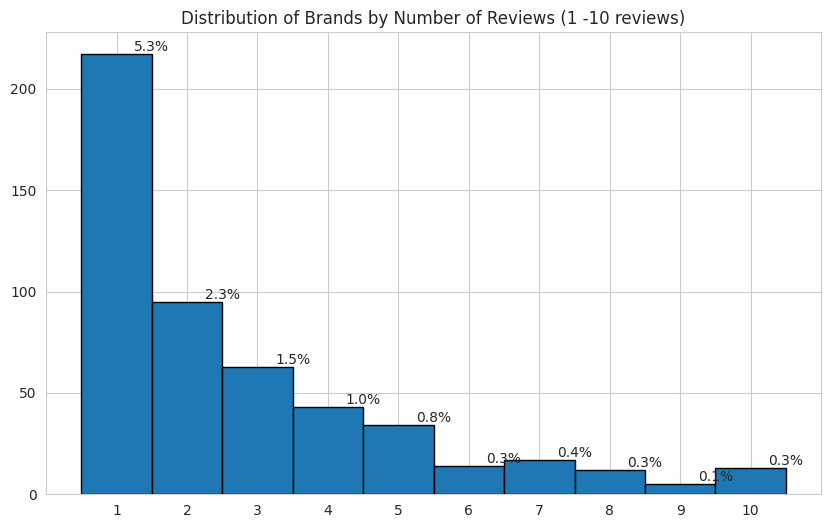

In [39]:
total_reviews = brand_review_counts.sum()

plt.figure(figsize=(10,6))
counts, bins, patches = plt.hist(brand_review_counts, bins=range(1,12), edgecolor='black', align='left')

for count, bin_edge in zip(counts, bins[:-1]):
    percentage = (count / total_reviews) * 100
    plt.text(bin_edge + 0.5, count, f'{percentage:.1f}%', ha='center', va='bottom')

plt.title('Distribution of Brands by Number of Reviews (1 -10 reviews)')
plt.xlabel=('Number of Reviews')
plt.ylabel=('Number of Brands')
plt.xticks(range(1,11))
plt.show()

In [40]:
brand_review_counts = df['Brand'].value_counts()

brand_avg_ratings = df.groupby('Brand')['Stars'].mean()

brand_stats = pd.DataFrame({
    'Review_Count': brand_review_counts,
    'Average_Rating': brand_avg_ratings
})

print(brand_stats.sort_values(by='Review_Count', ascending=False).head(10))

                 Review_Count  Average_Rating
Brand                                        
Nissin                    530        3.879953
Maruchan                  149        3.663591
Myojo                     133        3.909774
Nongshim                  126        4.039683
Samyang Foods             103        4.097087
Paldo                      87        4.043103
Sapporo Ichiban            83        3.737952
Mama                       71        3.628873
Acecook                    62        3.133065
Indomie                    60        4.016667


In [41]:
threshold = brand_stats['Review_Count'].quantile(0.8)

most_reviewed_brands = brand_stats[brand_stats['Review_Count'] > threshold]
less_reviewed_brands = brand_stats[brand_stats['Review_Count'] <= threshold]

avg_rating_most_reviewed = most_reviewed_brands['Average_Rating'].mean()
avg_rating_less_reviewed = less_reviewed_brands['Average_Rating'].mean()

print(f'Average Rating of most Reviewed Brand: {avg_rating_most_reviewed:.2f}')
print(f'Average Rating of less Reviewed Brand: {avg_rating_less_reviewed:.2f}')

Average Rating of most Reviewed Brand: 3.71
Average Rating of less Reviewed Brand: 3.56


TypeError: 'str' object is not callable

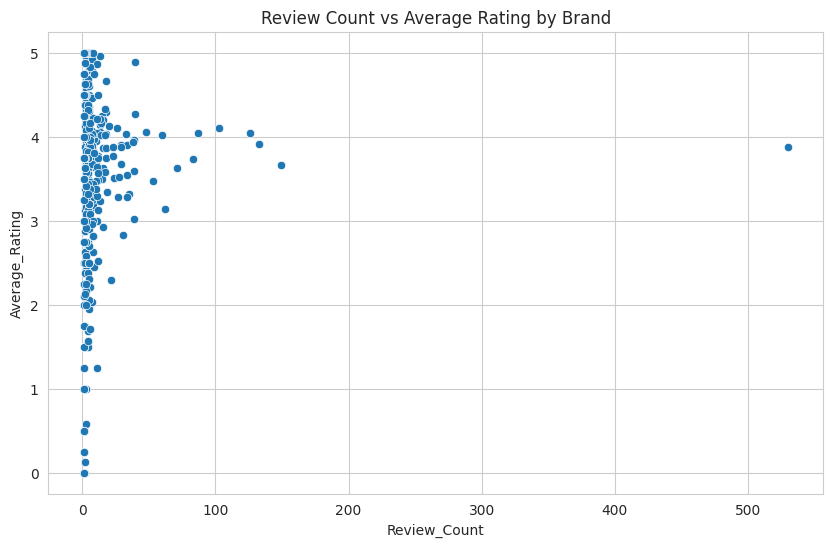

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Review_Count', y='Average_Rating', data=brand_stats)
plt.title('Review Count vs Average Rating by Brand')
plt.xlabel('Number of Reviews')
plt.ylabel('Average Rating')
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
sns.violinplot(x='Style', y='Stars' data=df)
plt.title('Distribution of ramen rating by style')
